In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/aug_151_neck_blast241.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast911.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast511.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast881.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/aug_85_neck_blast183.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast974.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast800.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/aug_208_neck_blast29.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast455.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/aug_61_neck_blast168.jpg
/kaggle/input/new-rice-data/Rice_Leaf_Diease/validation/neck_blast/neck_blast846.jpg
/kaggle/input/new-rice-data/Rice_Lea

KeyboardInterrupt: 

In [1]:
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import cv2
import kagglehub

2025-06-06 12:28:08.289236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749212888.471736      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749212888.526655      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path = kagglehub.dataset_download("nareshlankalapalli/paddy-disease")

Mounting files to /kaggle/input/paddy-disease...


In [3]:
# Paths


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size = 224  # or your preferred size
batch_size = 32
train_dir = '/kaggle/input/paddy-disease/rice_disease_data/train'
test_dir = '/kaggle/input/paddy-disease/rice_disease_data/test'

# Create training and validation ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'  # Subset for training
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'  # Subset for validation
)

# Testing generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

Found 11607 images belonging to 10 classes.
Found 2899 images belonging to 10 classes.
Found 3422 images belonging to 10 classes.


In [16]:
# Define CNN model for leaf disease classification
model = Sequential()

# Define the input shape based on the image size and color channels
# img_size = 128 # Change this
img_size = 224 # To match the ImageDataGenerator target_size
input_shape = (img_size, img_size, 3)

# First Convolutional Block
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,397,194 (73.99 MB)

 Trainable params: 19,397,194 (73.99 MB)

 Non-trainable params: 0 (0.00 B)

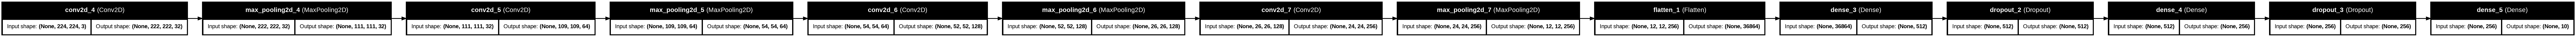

In [17]:
# Save visual block diagram
plot_model(model, to_file='paddy_leaf_cnn_model.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# Display block diagram
try:
    display(Image(filename='paddy_leaf_cnn_model.png'))
except:
    print("Model plot saved as 'paddy_leaf_cnn_model.png'")

In [18]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator ,
    validation_steps=validation_generator .samples //validation_generator .batch_size,
    verbose=1
)
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749213667.692387     116 service.cc:148] XLA service 0x791870005ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749213667.693095     116 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749213668.277870     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/290 ━━━━━━━━━━━━━━━━━━━━ 49:43 10s/step - accuracy: 0.1250 - loss: 2.3020

I0000 00:00:1749213673.981182     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


290/290 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.2999 - loss: 1.9449 - val_accuracy: 0.6559 - val_loss: 0.9671
Epoch 2/30
  1/290 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.6000 - loss: 1.2448

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


290/290 ━━━━━━━━━━━━━━━━━━━━ 48s 165ms/step - accuracy: 0.6000 - loss: 1.2448 - val_accuracy: 0.6948 - val_loss: 0.8907
Epoch 3/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 234s 806ms/step - accuracy: 0.6470 - loss: 1.0153 - val_accuracy: 0.7618 - val_loss: 0.6966
Epoch 4/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 45s 154ms/step - accuracy: 0.7500 - loss: 0.5844 - val_accuracy: 0.7646 - val_loss: 0.6792
Epoch 5/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 220s 758ms/step - accuracy: 0.7287 - loss: 0.7705 - val_accuracy: 0.8149 - val_loss: 0.5074
Epoch 6/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 45s 155ms/step - accuracy: 0.8750 - loss: 0.3791 - val_accuracy: 0.8170 - val_loss: 0.4983
Epoch 7/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 224s 772ms/step - accuracy: 0.7740 - loss: 0.6378 - val_accuracy: 0.8243 - val_loss: 0.4869
Epoch 8/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 45s 155ms/step - accuracy: 0.8000 - loss: 0.5014 - val_accuracy: 0.8344 - val_loss: 0.4788
Epoch 9/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 222s 767ms/step - accuracy: 0.8180 - loss: 0.5217 -

In [21]:
model.save("/kaggle/working/paddy_basiccnn251_leaf_disease_model.h5")

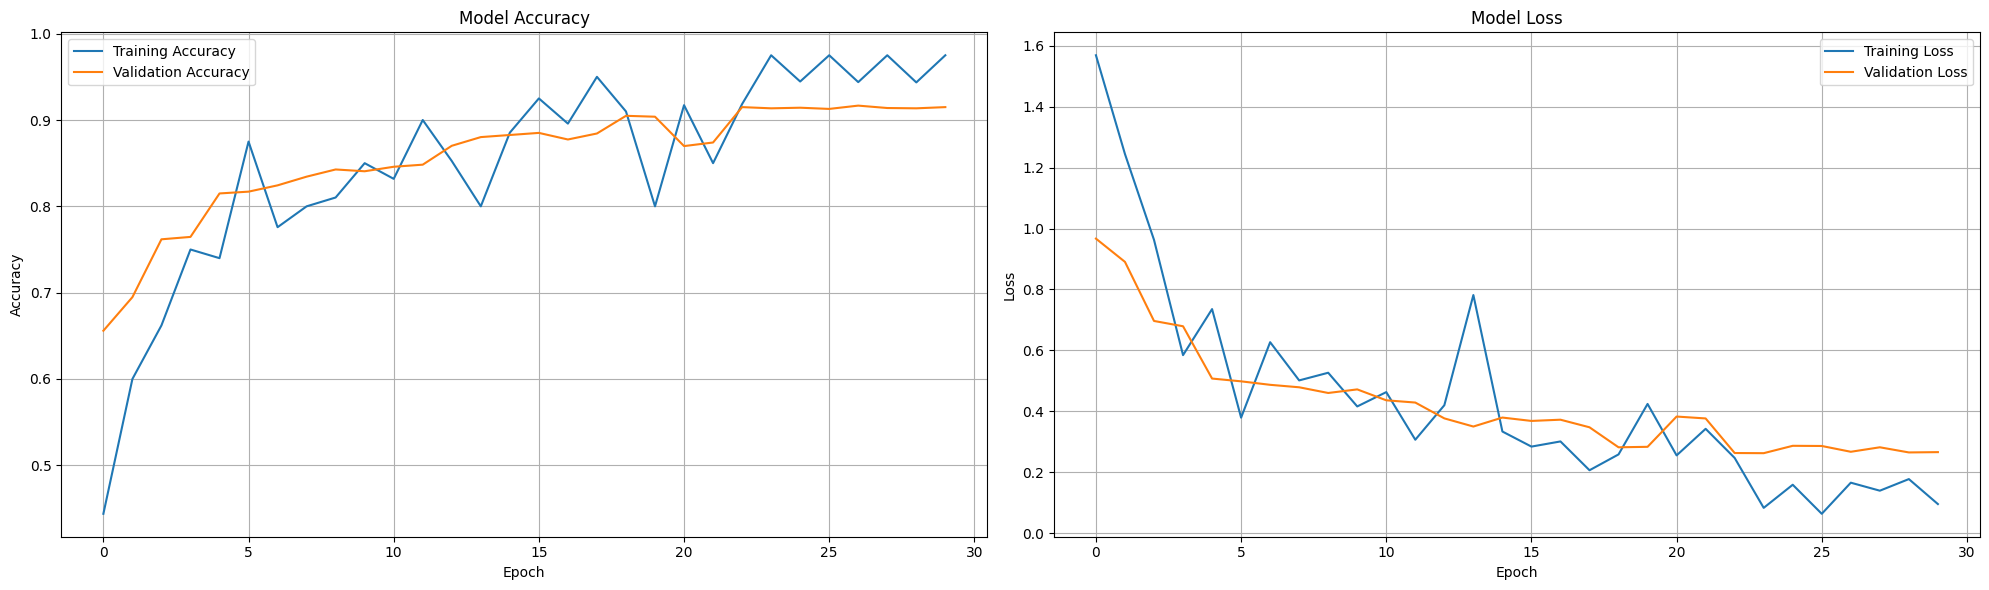

In [22]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(20,6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




73/73 ━━━━━━━━━━━━━━━━━━━━ 50s 671ms/step


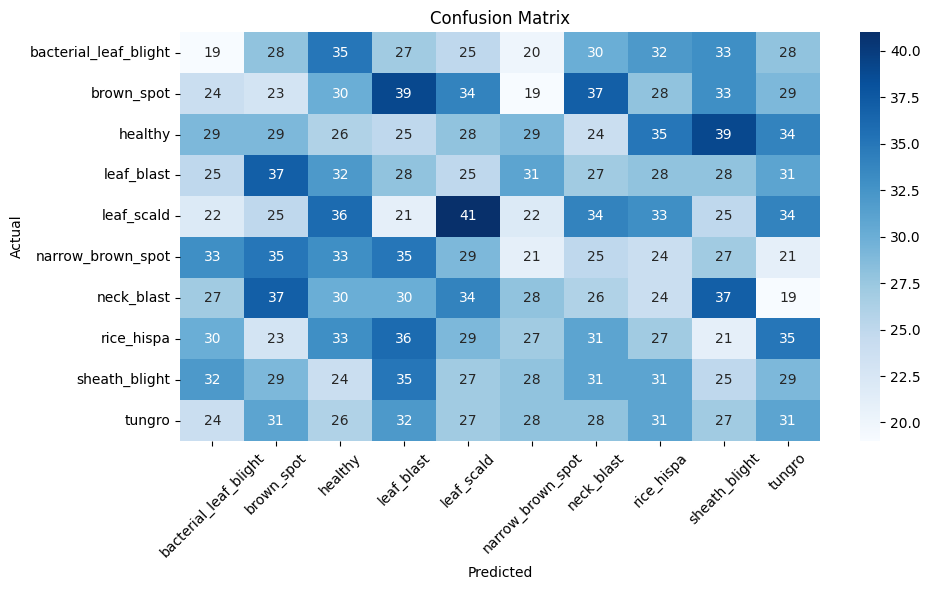


Classification Report:
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.07      0.07      0.07       277
           brown_spot       0.08      0.08      0.08       296
              healthy       0.09      0.09      0.09       298
           leaf_blast       0.09      0.10      0.09       292
           leaf_scald       0.14      0.14      0.14       293
    narrow_brown_spot       0.08      0.07      0.08       283
           neck_blast       0.09      0.09      0.09       292
           rice_hispa       0.09      0.09      0.09       292
        sheath_blight       0.08      0.09      0.09       291
               tungro       0.11      0.11      0.11       285

             accuracy                           0.09      2899
            macro avg       0.09      0.09      0.09      2899
         weighted avg       0.09      0.09      0.09      2899



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Get true labels from validation set ---
Y_true = validation_generator.classes

# --- Predict class probabilities using the trained model ---
# Cast the result of np.ceil to an integer for the 'steps' argument
Y_pred_probs = model.predict(validation_generator, steps=int(np.ceil(validation_generator.samples / validation_generator.batch_size)))

# --- Get predicted class indices ---
Y_pred = np.argmax(Y_pred_probs, axis=1)

# --- Get class names ---
class_names = list(validation_generator.class_indices.keys())

# --- Generate the confusion matrix ---
cm = confusion_matrix(Y_true, Y_pred)

# --- Plot the confusion matrix ---
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Print classification report ---
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_names))

In [25]:
test_loss, test_acc = model.evaluate(train_generator)
print("Train Accuracy:", test_acc)
print("Train Loss:", test_loss)

291/291 ━━━━━━━━━━━━━━━━━━━━ 194s 668ms/step - accuracy: 0.9859 - loss: 0.0642
Train Accuracy: 0.9866459965705872
Train Loss: 0.06300646811723709


In [27]:
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

73/73 ━━━━━━━━━━━━━━━━━━━━ 49s 669ms/step - accuracy: 0.9092 - loss: 0.2830
Validation Accuracy: 0.9147982001304626
Validation Loss: 0.26811668276786804


In [28]:
test_loss, test_acc = model.evaluate(test_generator)
print("test Accuracy:", test_acc)
print("test Loss:", test_loss)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.0058 - loss: 17.5641
test Accuracy: 0.005844535306096077
test Loss: 17.88278579711914
